In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import *

In [2]:
# 변수의 특성 중요도 계산하기
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    #변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    #변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(10,100))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance', fontsize=20, fontweight='bold')
        plt.ylabel('feature name', fontsize=20, fontweight='bold')
        plt.grid()

    return fi_df

# Random Forest Classification

In [3]:
import pandas as pd
import numpy as np

file_paths = {
    "jumping": "jumping_dataset.csv",   # 점프
    "shaking_lr": "shaking_lr_dataset.csv",  # 좌우로 흔들기
    "shaking_fb": "shaking_fb_dataset.csv",  # 앞뒤로 흔들기
    "rotate_cw": "rotate_cw_dataset.csv",    # 시계 방향으로 돌리기
    "rotate_ccw": "rotate_ccw_dataset.csv",  # 반시계 방향으로 돌리기
}

dataframes = {key: pd.read_csv(path) for key, path in file_paths.items()}

combined_df = pd.concat(dataframes.values(), ignore_index=True)
combined_df.head()

combined_df.to_csv('sensor_data.csv', index=False)

In [4]:
data = pd.read_csv('sensor_data.csv')

In [6]:
#전체 데이터의 행,열 개수 확인
data.shape

(944, 70)

In [5]:
# 전체 데이터의 상위 5개 행 확인
data.head()

,mean_acceleration_x,std_acceleration_x,mad_acceleration_x,max_acceleration_x,min_acceleration_x,energy_acceleration_x,bandsEnergy_acceleration_x,iqr_acceleration_x,meanFreq_acceleration_x,skewness_acceleration_x,...,energy_gyro_z,bandsEnergy_gyro_z,iqr_gyro_z,meanFreq_gyro_z,skewness_gyro_z,kurtosis_gyro_z,sma_acc,sma_gyro,angle_acc_gyro,label
0,5.116406,17.380434,10.424653,46.241012,-34.851047,325.236293,27576.123756,17.840955,-0.001221,-0.370538,...,21.176402,1742.690744,2.955603,-0.000279,1.403832,1.743974,25.170167,5.715627,0.735614,jumping
1,6.348106,23.097543,16.827497,46.241012,-34.851047,568.459991,47565.470988,39.506385,-0.000197,-0.148626,...,29.044501,2269.393375,8.975977,-0.000262,0.440991,-0.803594,33.416573,6.757869,1.514264,jumping
2,6.933795,21.229315,18.827329,44.736705,-27.075578,494.254495,42442.432667,35.656471,-0.001158,-0.028441,...,21.265489,1668.197062,7.931080,-0.000583,0.102929,-1.256568,30.948479,6.459381,2.200134,jumping
3,4.681370,19.115007,14.301913,39.048531,-32.370804,383.644882,31716.804779,29.206006,-0.000807,-0.180624,...,20.689615,1623.196042,6.943925,-0.000029,0.049939,-0.932274,28.399035,6.663466,2.063881,jumping
4,4.166894,16.854734,8.024915,39.048531,-32.370804,298.604246,24685.474373,20.108039,-0.000160,-0.440895,...,16.922827,1322.820254,4.805995,-0.000576,0.109087,-0.605814,26.385991,6.201563,2.026626,jumping


In [7]:
#전체 데이터의 모든 변수 확인
data.columns

Index(['mean_acceleration_x', 'std_acceleration_x', 'mad_acceleration_x',
       'max_acceleration_x', 'min_acceleration_x', 'energy_acceleration_x',
       'bandsEnergy_acceleration_x', 'iqr_acceleration_x',
       'meanFreq_acceleration_x', 'skewness_acceleration_x',
       'kurtosis_acceleration_x', 'mean_acceleration_y', 'std_acceleration_y',
       'mad_acceleration_y', 'max_acceleration_y', 'min_acceleration_y',
       'energy_acceleration_y', 'bandsEnergy_acceleration_y',
       'iqr_acceleration_y', 'meanFreq_acceleration_y',
       'skewness_acceleration_y', 'kurtosis_acceleration_y',
       'mean_acceleration_z', 'std_acceleration_z', 'mad_acceleration_z',
       'max_acceleration_z', 'min_acceleration_z', 'energy_acceleration_z',
       'bandsEnergy_acceleration_z', 'iqr_acceleration_z',
       'meanFreq_acceleration_z', 'skewness_acceleration_z',
       'kurtosis_acceleration_z', 'mean_gyro_x', 'std_gyro_x', 'mad_gyro_x',
       'max_gyro_x', 'min_gyro_x', 'energy_gyro_x', 

In [8]:
#전체 데이터의 수치형 변수 분포 확인
data.describe()

,mean_acceleration_x,std_acceleration_x,mad_acceleration_x,max_acceleration_x,min_acceleration_x,energy_acceleration_x,bandsEnergy_acceleration_x,iqr_acceleration_x,meanFreq_acceleration_x,skewness_acceleration_x,...,min_gyro_z,energy_gyro_z,bandsEnergy_gyro_z,iqr_gyro_z,meanFreq_gyro_z,skewness_gyro_z,kurtosis_gyro_z,sma_acc,sma_gyro,angle_acc_gyro
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,9.440000e+02,944.000000,...,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,-3.025421,12.541333,9.249932,17.031736,-26.287119,220.761782,21257.380099,20.057018,-7.149451e-04,-0.169237,...,-4.660116,13.432015,1082.219426,5.944418,-0.000770,0.249788,-1.032615,24.403979,6.232579,1.581044
std,6.478564,3.758346,3.615499,12.641306,9.214438,120.593664,12451.551653,7.011408,3.796982e-04,0.452259,...,1.589748,8.924503,704.029932,2.432741,0.000426,0.446541,0.660023,6.259185,1.838019,0.776642
min,-15.986049,1.540763,0.488118,-1.028609,-50.330758,6.282444,567.865130,1.018658,-1.968197e-03,-1.498309,...,-9.360185,0.375289,30.298735,0.531744,-0.001753,-1.820221,-1.825118,13.444843,1.627016,0.041810
25%,-8.748598,10.390350,6.712986,5.854796,-32.926558,142.887903,12497.816659,15.381764,-1.015513e-03,-0.483081,...,-5.475123,6.947614,580.807013,4.311120,-0.001137,-0.023662,-1.406286,19.787520,4.741690,0.902890
50%,-1.660457,12.462589,9.188348,16.983793,-27.887511,210.982166,19506.908032,20.334086,-7.327803e-04,-0.160483,...,-4.631094,11.833343,955.448117,6.074333,-0.000791,0.295186,-1.225353,23.032103,6.285578,1.614783
75%,2.420686,14.594264,11.829844,24.428451,-19.759720,276.253276,26103.191246,24.385935,-3.991032e-04,0.118148,...,-3.634000,16.643752,1364.730465,7.477495,-0.000401,0.527659,-0.916818,28.656980,7.797708,2.276018
max,10.940450,30.042704,26.520722,76.318320,0.863858,1009.779465,88073.956394,57.521069,-4.965153e-07,1.669322,...,-0.276527,44.026734,3677.286980,12.745012,-0.000007,1.889518,4.382263,45.411653,10.703459,3.114977


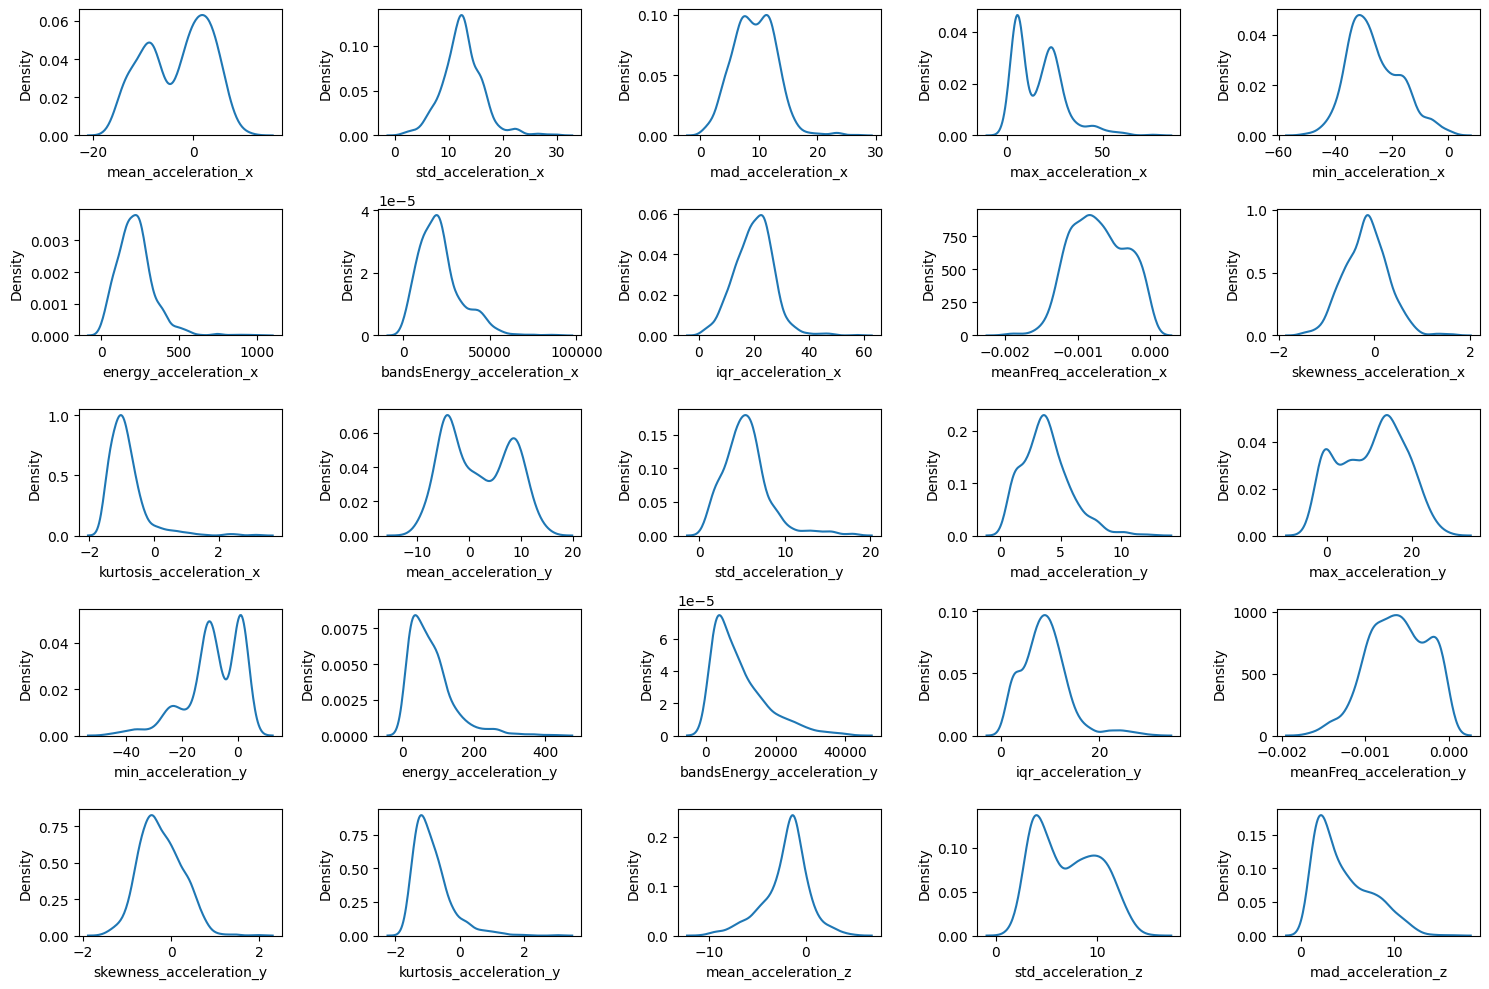

In [9]:
# kde로 feature 분포 확인
fig, axes = plt.subplots(5, 5, figsize=(15,10))
idx = 0
for i in range(5):
    for j in range(5):
        sns.kdeplot(data[data.columns[idx]], ax=axes[i,j])
        idx += 1
plt.tight_layout()
plt.show()

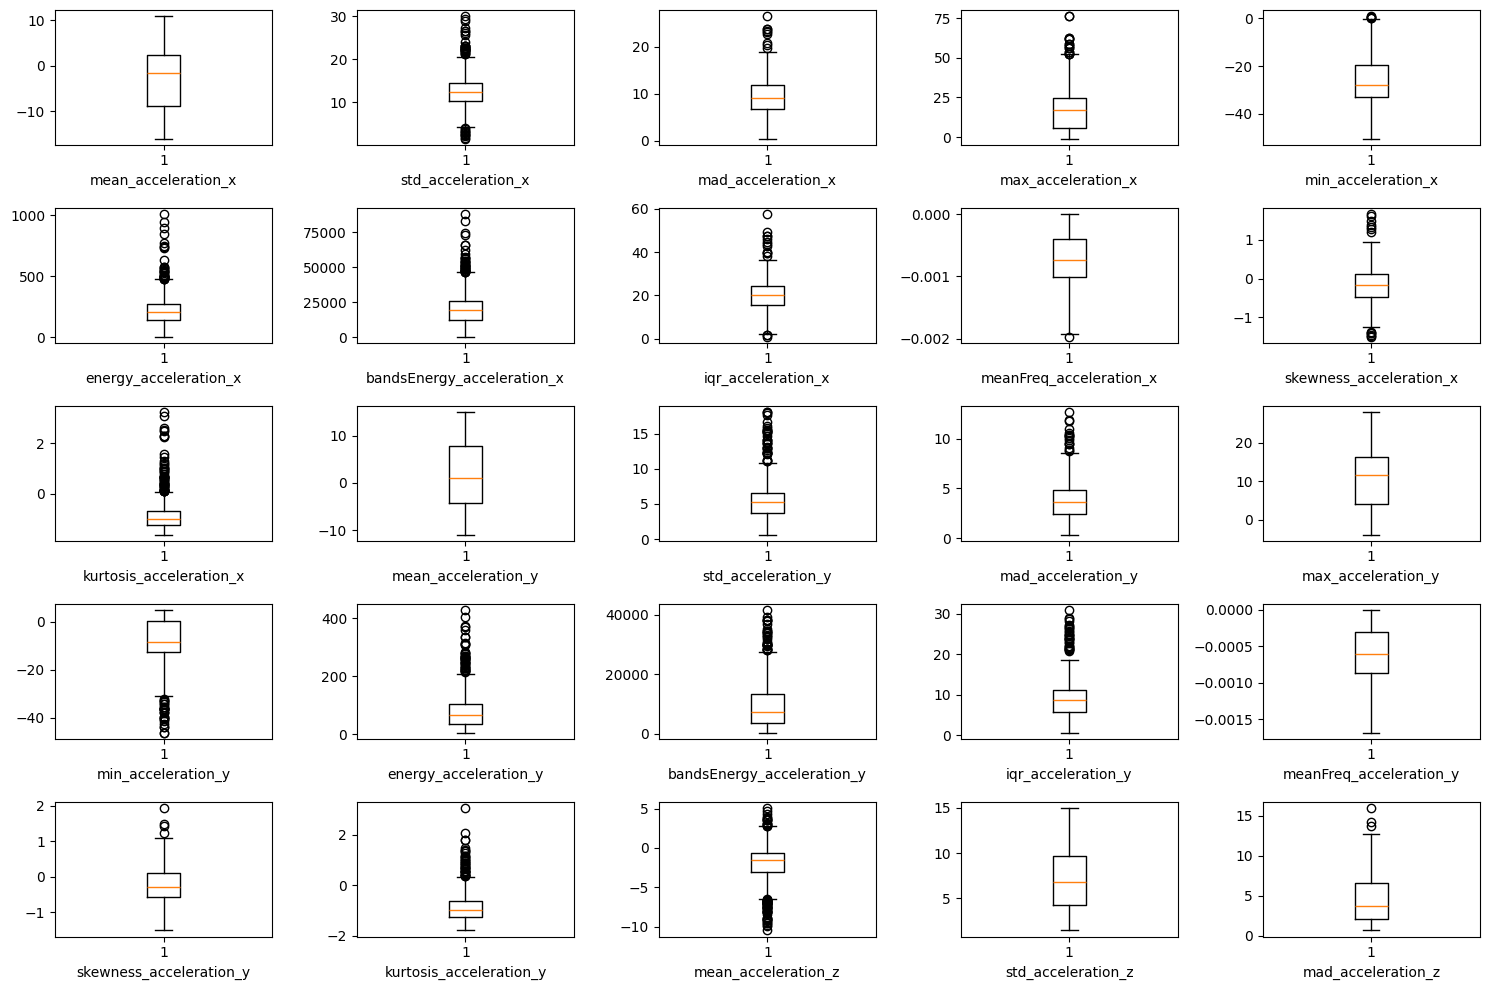

In [10]:
# boxplot()으로 feature 분포 확인
fig, axes = plt.subplots(5, 5, figsize=(15,10))
idx = 0
for i in range(5):
    for j in range(5):
        axes[i,j].boxplot(data[data.columns[idx]])
        axes[i,j].set_xlabel(data.columns[idx])
        idx += 1
plt.tight_layout()
plt.show()

In [11]:
# 전체 데이터의 이변량 분석 (corr)
data.iloc[:, :-1].corr()

,mean_acceleration_x,std_acceleration_x,mad_acceleration_x,max_acceleration_x,min_acceleration_x,energy_acceleration_x,bandsEnergy_acceleration_x,iqr_acceleration_x,meanFreq_acceleration_x,skewness_acceleration_x,...,min_gyro_z,energy_gyro_z,bandsEnergy_gyro_z,iqr_gyro_z,meanFreq_gyro_z,skewness_gyro_z,kurtosis_gyro_z,sma_acc,sma_gyro,angle_acc_gyro
mean_acceleration_x,1.000000,0.125866,-0.085787,0.803550,0.538748,-0.208910,-0.457397,-0.144208,0.150099,0.300615,...,0.193178,-0.129364,-0.143134,-0.304158,0.323181,0.127570,0.358974,-0.637670,-0.774708,0.014438
std_acceleration_x,0.125866,1.000000,0.841800,0.613859,-0.626146,0.856133,0.661303,0.885313,0.057664,0.061511,...,-0.601593,0.611285,0.604713,0.557438,0.101952,0.312263,-0.041160,0.414230,0.279696,0.035701
mad_acceleration_x,-0.085787,0.841800,1.000000,0.388145,-0.542380,0.829674,0.725255,0.941112,0.004458,0.183970,...,-0.556323,0.579814,0.576596,0.601952,0.073841,0.178055,-0.210958,0.500060,0.340400,0.027854
max_acceleration_x,0.803550,0.613859,0.388145,1.000000,0.141299,0.328894,0.053847,0.333441,0.141307,0.457917,...,-0.092636,0.148878,0.133984,-0.005016,0.314802,0.272484,0.278992,-0.244386,-0.488513,0.015454
min_acceleration_x,0.538748,-0.626146,-0.542380,0.141299,1.000000,-0.675124,-0.679046,-0.629607,0.072750,0.483122,...,0.699393,-0.669887,-0.675228,-0.692762,0.127341,-0.214724,0.210772,-0.665263,-0.786666,-0.011633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
skewness_gyro_z,0.127570,0.312263,0.178055,0.272484,-0.214724,0.224858,0.159039,0.196448,0.105092,-0.040095,...,-0.112316,0.156093,0.145088,0.033628,0.079153,1.000000,0.365975,0.081080,0.045069,0.019251
kurtosis_gyro_z,0.358974,-0.041160,-0.210958,0.278992,0.210772,-0.078004,-0.128866,-0.195949,0.099680,0.144776,...,0.211372,-0.215581,-0.218875,-0.509759,0.130811,0.365975,1.000000,-0.114784,-0.406305,-0.003871
sma_acc,-0.637670,0.414230,0.500060,-0.244386,-0.665263,0.710737,0.835107,0.576155,-0.119348,-0.098371,...,-0.302236,0.237621,0.245441,0.312412,-0.256382,0.081080,-0.114784,1.000000,0.758889,-0.095692
sma_gyro,-0.774708,0.279696,0.340400,-0.488513,-0.786666,0.481163,0.610718,0.435927,-0.155179,-0.428192,...,-0.547198,0.500842,0.511134,0.640285,-0.290609,0.045069,-0.406305,0.758889,1.000000,-0.078654


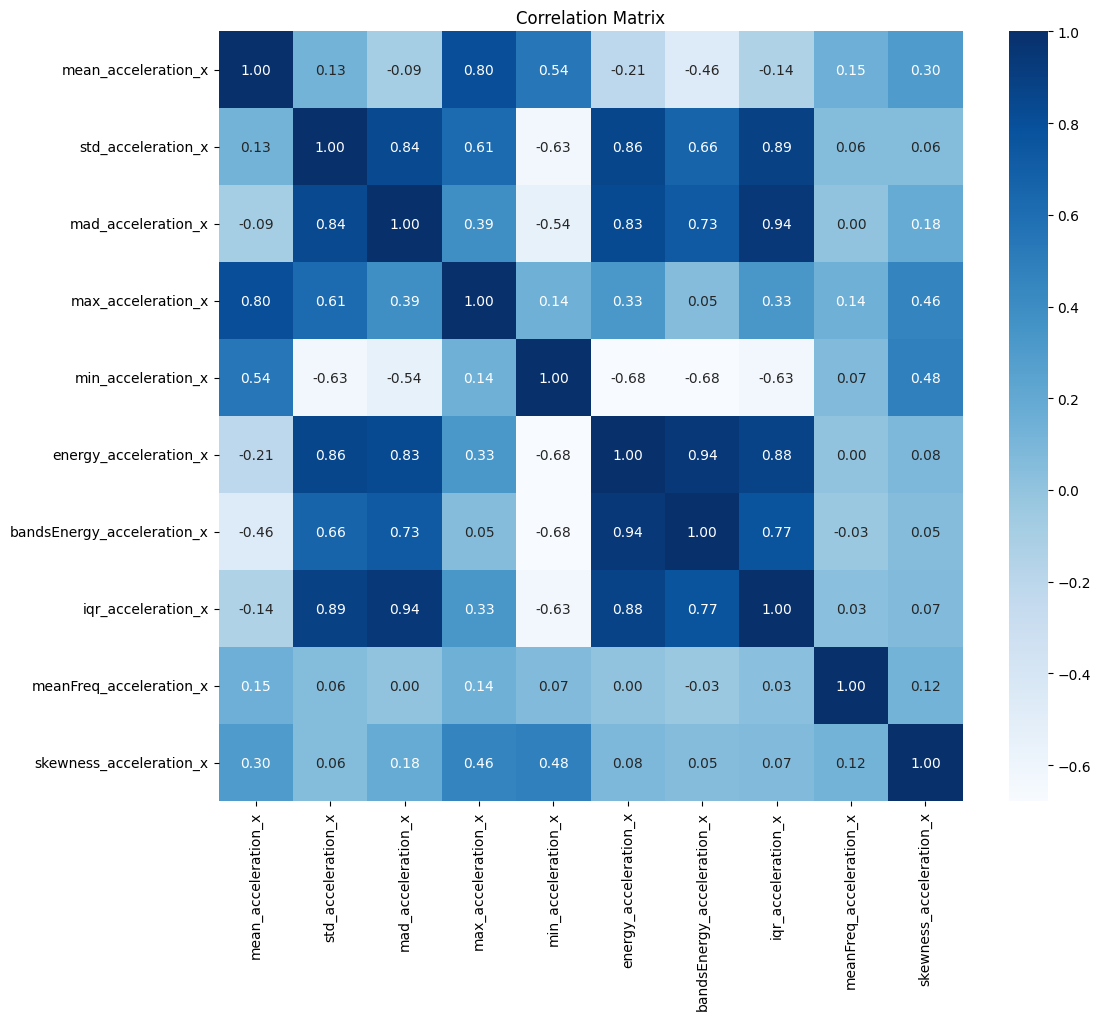

In [12]:
# 이변량 시각화(변수 10개만 선택하여 표현).
correlation_matrix = data.iloc[:, :10].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [13]:
target = data.loc[:, 'label']

In [14]:
# 범주의 종류
target.unique()

array(['jumping', 'shaking_lr', 'shaking_fb', 'rotate_cw', 'rotate_ccw'],
      dtype=object)

In [15]:
# 범주별 빈도수
target.value_counts()

,count
label,
jumping,191
shaking_fb,189
shaking_lr,188
rotate_cw,188
rotate_ccw,188


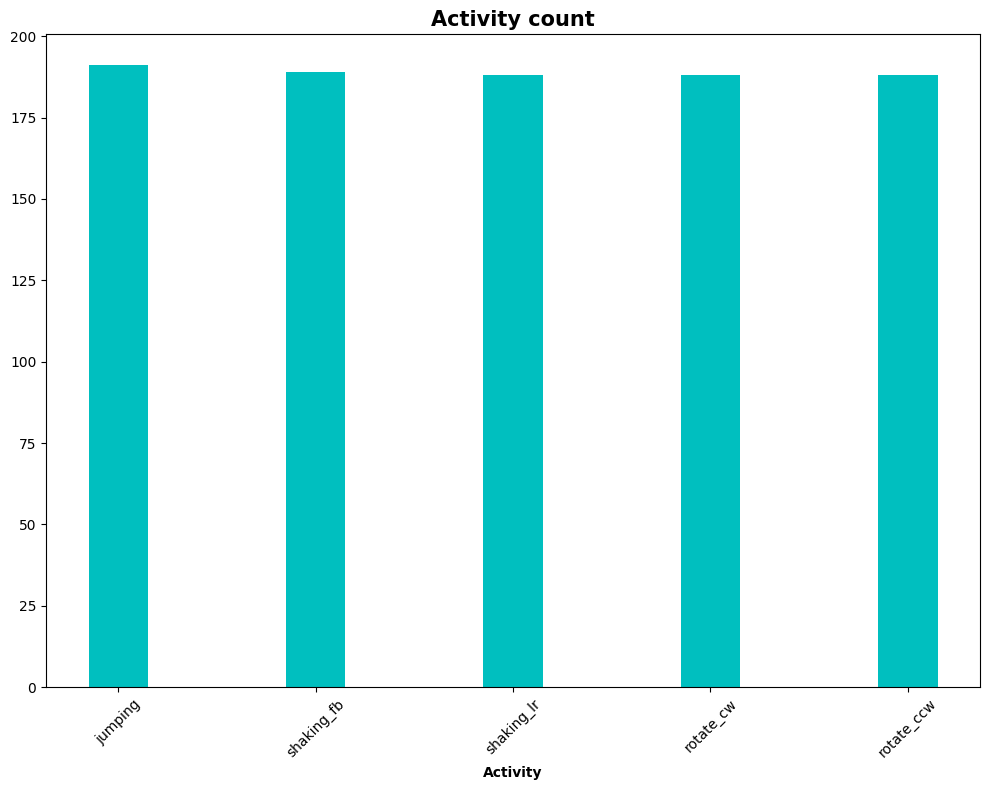

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(target.value_counts().index, target.value_counts(), width=0.3, color='c')
ax.set_title('Activity count', fontsize=15, fontweight='bold')
ax.set_xlabel('Activity', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# 범주별 비율
target_proportion = target.value_counts(normalize=True)*100
target_proportion

,proportion
label,
jumping,20.233051
shaking_fb,20.021186
shaking_lr,19.915254
rotate_cw,19.915254
rotate_ccw,19.915254


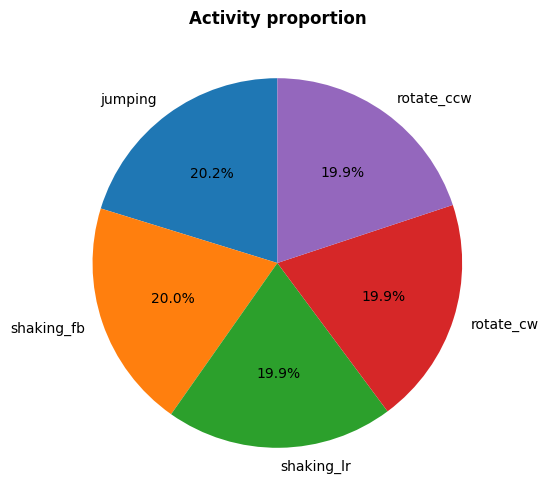

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(target_proportion, labels=target_proportion.index, startangle=90, autopct='%.1f%%')
ax.set_title('Activity proportion', fontweight='bold')
plt.show()

## Splitting the dataset into the Training set and Test set

In [19]:
# 데이터 분할을 위한 전처리

target = 'label'

x = data.drop(target, axis = 1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state=42)

## Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_val_scaled = sc.transform(x_val)

In [21]:
# 넘파이 배열을 다시 데이터프레임으로 변환
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_val = pd.DataFrame(x_val_scaled, columns=x_val.columns, index=x_val.index)

## Training the Random Forest Classification model on the Training set

In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

## Predicting the Test set results

In [23]:
y_pred = classifier.predict(x_val)

## Evaluate

In [24]:
#평가
from sklearn.metrics import *
print('accuracy :',accuracy_score(y_val, y_pred))
print('='*60)
print(confusion_matrix(y_val, y_pred))
print('='*60)
print(classification_report(y_val, y_pred))

accuracy : 0.9841269841269841
[[31  0  0  0  0]
 [ 0 37  0  0  1]
 [ 0  0 36  0  1]
 [ 0  0  0 40  1]
 [ 0  0  0  0 42]]
              precision    recall  f1-score   support

     jumping       1.00      1.00      1.00        31
  rotate_ccw       1.00      0.97      0.99        38
   rotate_cw       1.00      0.97      0.99        37
  shaking_fb       1.00      0.98      0.99        41
  shaking_lr       0.93      1.00      0.97        42

    accuracy                           0.98       189
   macro avg       0.99      0.98      0.99       189
weighted avg       0.99      0.98      0.98       189



,feature_name,feature_importance
0,min_acceleration_y,0.078234
1,mean_acceleration_x,0.061049
2,mean_gyro_y,0.054099
3,min_gyro_y,0.040231
4,max_acceleration_y,0.037728
...,...,...
64,meanFreq_acceleration_y,0.000580
65,meanFreq_gyro_z,0.000563
66,meanFreq_gyro_x,0.000347
67,meanFreq_acceleration_x,0.000331


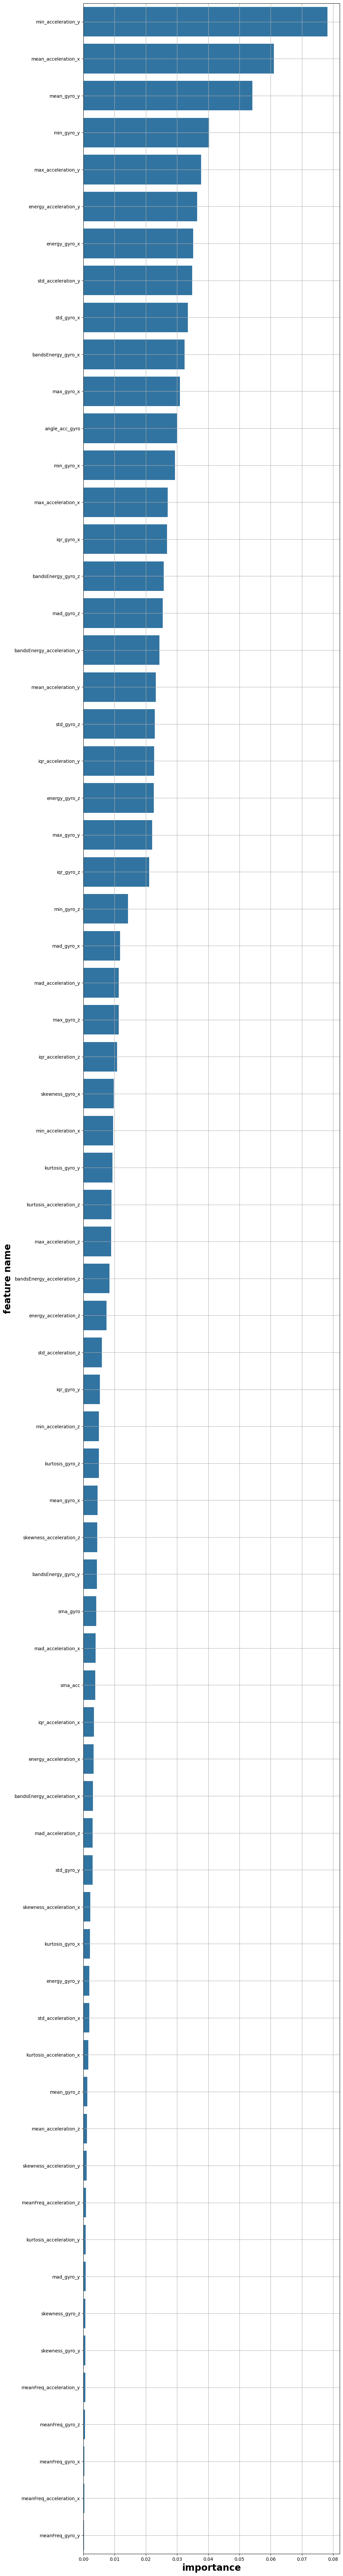

In [25]:
# 변수 중요도 추출
r = plot_feature_importance(classifier.feature_importances_, list(x_train), False)
r

In [26]:
# 중요도 상위 top5
r.head(5)

,feature_name,feature_importance
0,min_acceleration_y,0.078234
1,mean_acceleration_x,0.061049
2,mean_gyro_y,0.054099
3,min_gyro_y,0.040231
4,max_acceleration_y,0.037728


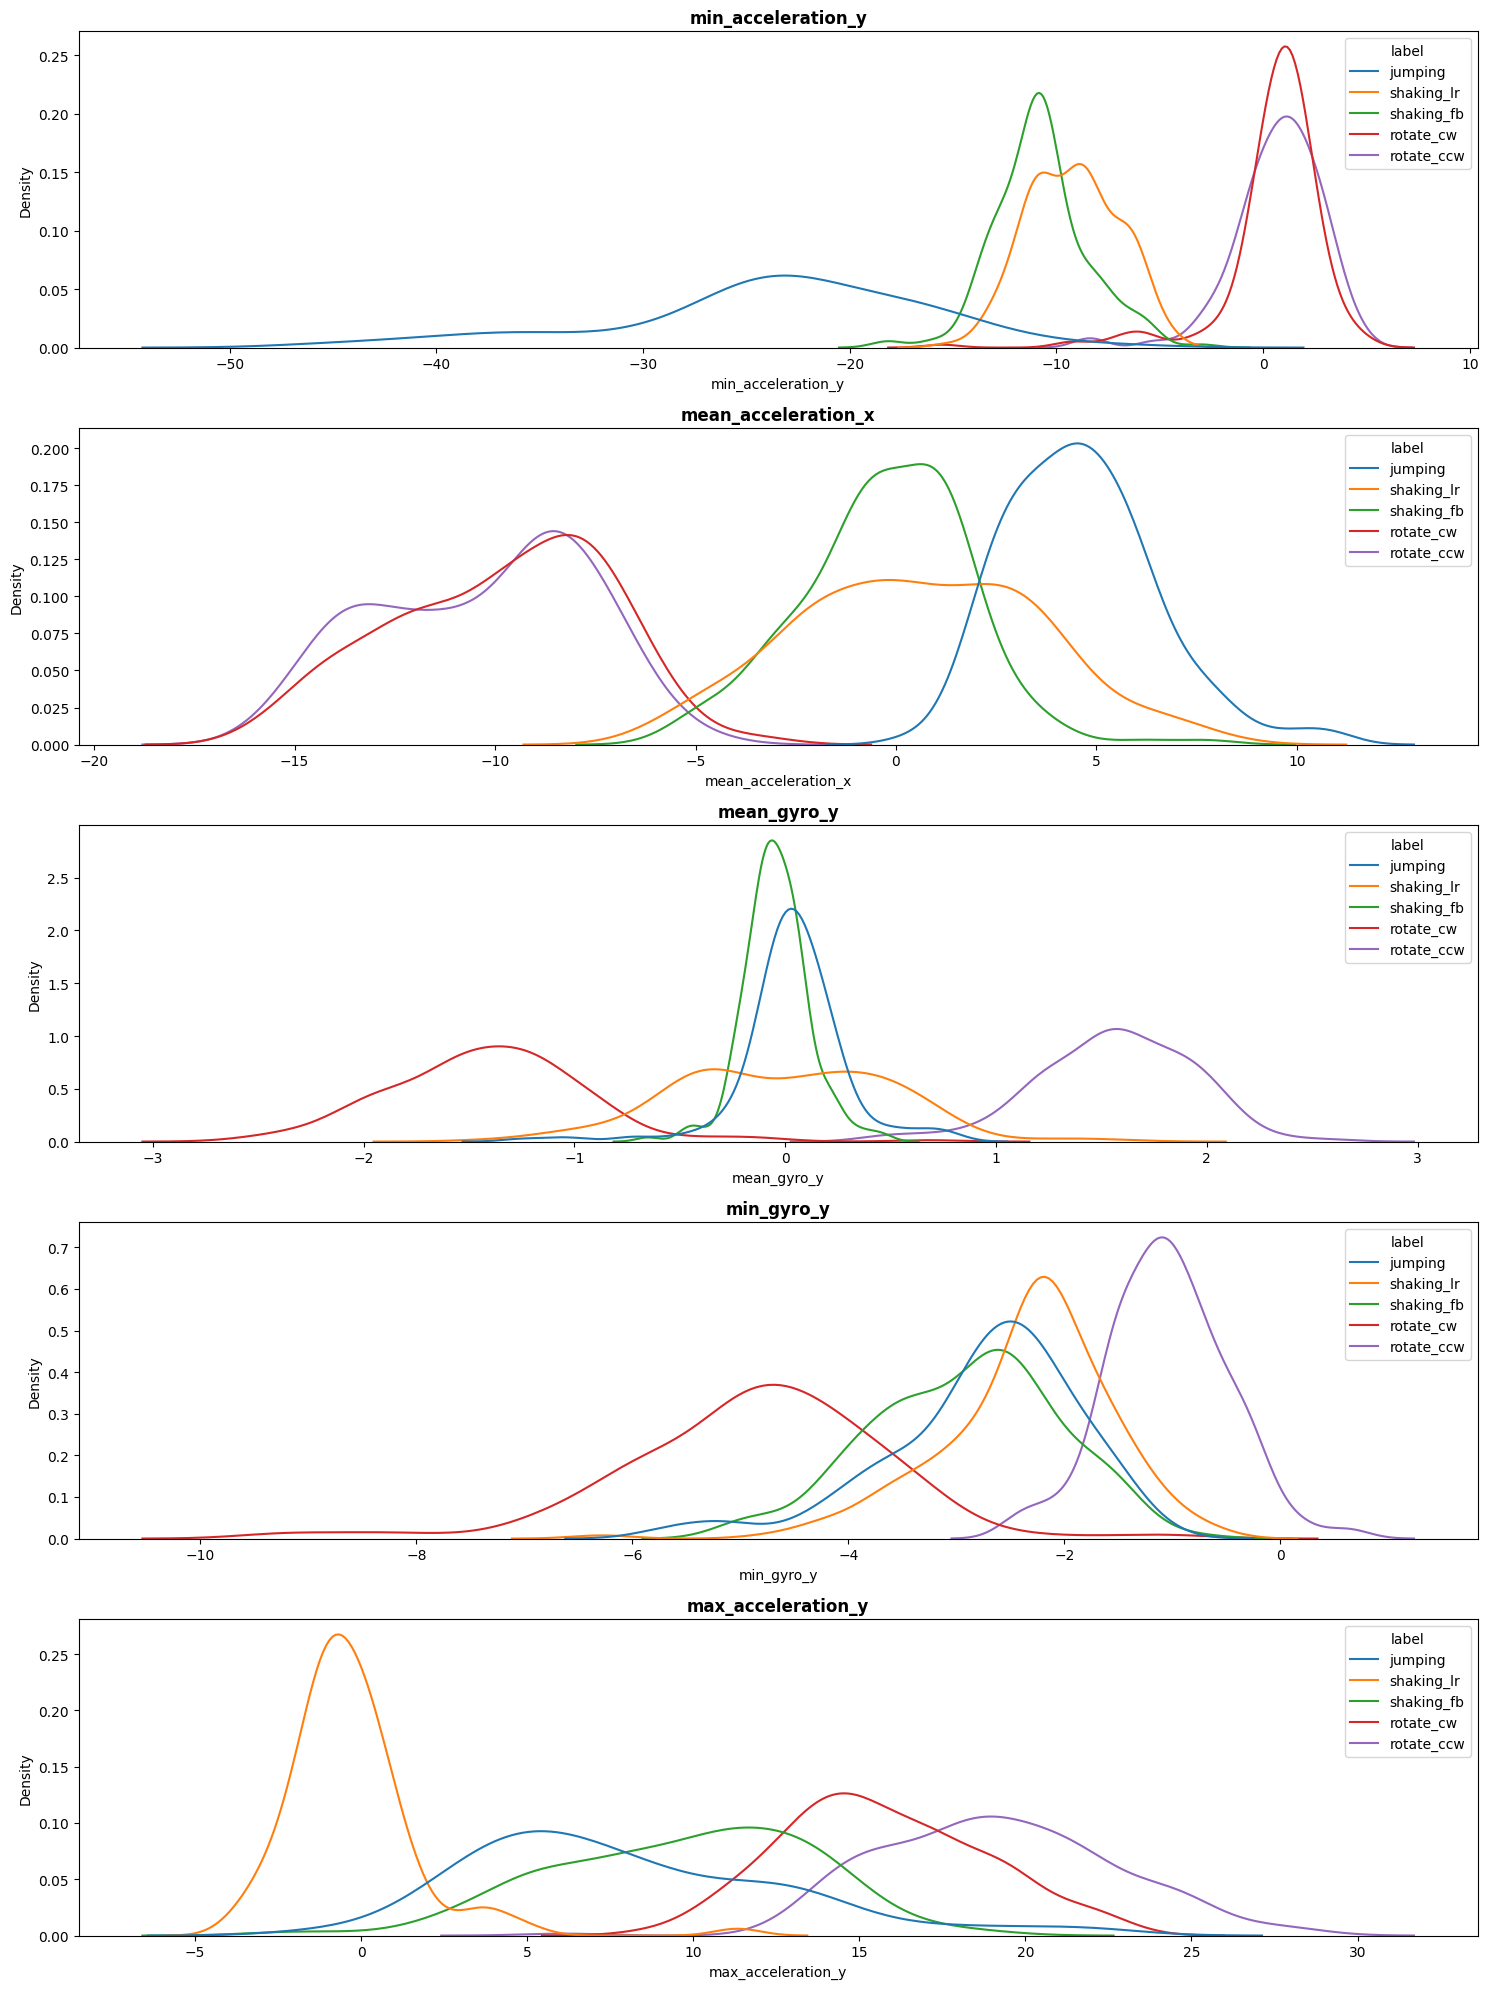

In [28]:
# 중요도 상위 5개 정보에 대한 분석
fig, ax = plt.subplots(5, figsize=(15,20))
for i in range(5):
    var = r.iloc[i, 0]
    sns.kdeplot(x=var, data=data, hue=target, common_norm=False, ax=ax[i])
    ax[i].set_title(f'{var}', fontweight='bold')
plt.tight_layout()
plt.show()

In [27]:
# 중요도 하위 top5
r.tail(5)

,feature_name,feature_importance
64,meanFreq_acceleration_y,0.000580
65,meanFreq_gyro_z,0.000563
66,meanFreq_gyro_x,0.000347
67,meanFreq_acceleration_x,0.000331
68,meanFreq_gyro_y,0.000243


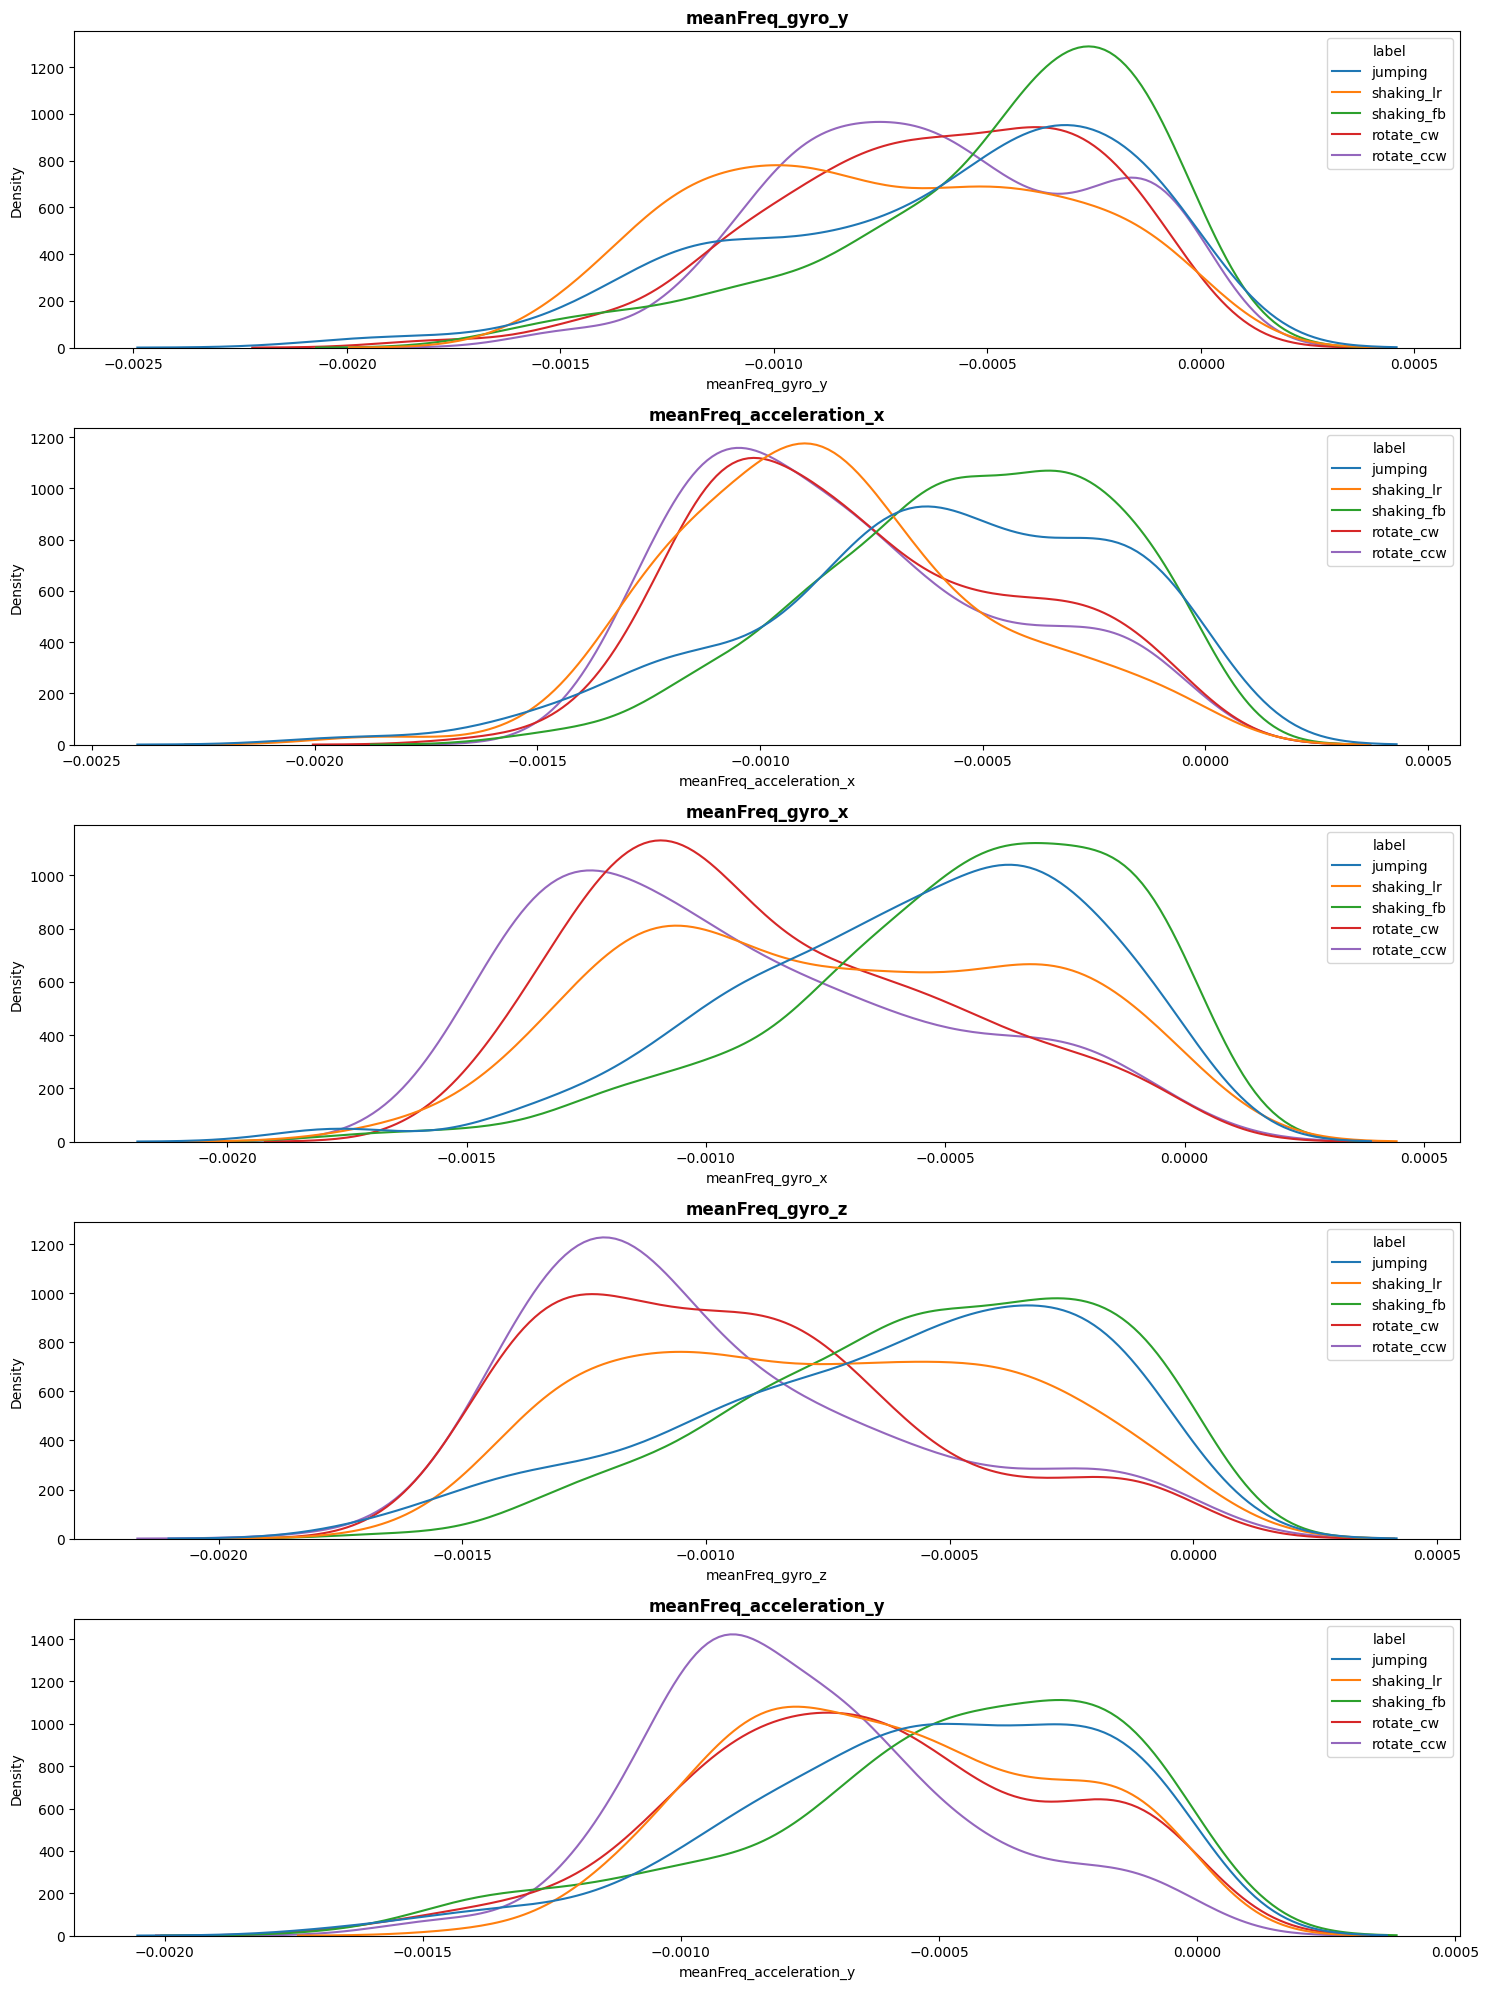

In [29]:
# 중요도 하위 5개 정보에 대한 분석
fig, ax = plt.subplots(5, figsize=(15,20))
for i in range(1,6):
    var = r.iloc[-i, 0]
    sns.kdeplot(x=var, data=data, hue=target, common_norm=False, ax=ax[i-1])
    ax[i-1].set_title(f'{var}', fontweight='bold')

plt.tight_layout()
plt.show()

In [30]:
# 중요도 상위 변수 몇개만 가지고 다시 모델링

# 데이터 분할을 위한 전처리
target = 'label'

x = data.drop(target, axis = 1)
x = x[r.iloc[:10, 0]]
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state=42)

#생성
model = RandomForestClassifier(random_state=42)

#학습
model.fit(x_train, y_train)
pred = model.predict(x_val)

#평가
print('accuracy :',accuracy_score(y_val, pred))
print('='*60)
print(confusion_matrix(y_val, pred))
print('='*60)
print(classification_report(y_val, pred))

accuracy : 0.9523809523809523
[[26  0  0  3  2]
 [ 0 38  0  0  0]
 [ 0  0 36  1  0]
 [ 1  0  0 39  1]
 [ 0  0  0  1 41]]
              precision    recall  f1-score   support

     jumping       0.96      0.84      0.90        31
  rotate_ccw       1.00      1.00      1.00        38
   rotate_cw       1.00      0.97      0.99        37
  shaking_fb       0.89      0.95      0.92        41
  shaking_lr       0.93      0.98      0.95        42

    accuracy                           0.95       189
   macro avg       0.96      0.95      0.95       189
weighted avg       0.95      0.95      0.95       189



In [31]:
x.columns

Index(['min_acceleration_y', 'mean_acceleration_x', 'mean_gyro_y',
       'min_gyro_y', 'max_acceleration_y', 'energy_acceleration_y',
       'energy_gyro_x', 'std_acceleration_y', 'std_gyro_x',
       'bandsEnergy_gyro_x'],
      dtype='object')